# Monty Hall problem

You are playing a TV game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
- Now a third player comes in who has not seen what happened earlier. They pick a door.

## Simulation
 - Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

N=3
p=1
trials = int(1e5)

def open_door(door, choice):
    # open a door that is not the choice and does not have a car
    open_door = random.choice([i for i in range(N) if i != choice and door[i] == 0])
    return open_door

def switch_door(door, choice, opened):
    # switch to one of the other unopened doors
    return random.choice([i for i in range(N) if i != choice and i != opened])

def newcomer_door(door, opened):
    # open a door that is not open
    return random.choice([i for i in range(N) if i != opened])

conservative_wins = 0
switch_wins = 0
newcomer_wins = 0
# simulate the game 1000 times

for _ in range(trials):

    door = np.zeros(N)
    door[random.randint(0, N-1)] = 1

    choice = random.randint(0, N-1)

    opened = open_door(door, choice)
    switched_choice = switch_door(door, choice, opened)
    newcomer_choice = newcomer_door(door, opened)

    if door[choice] == 1:
        conservative_wins += 1
    if door[switched_choice] == 1:
        switch_wins += 1
    if door[newcomer_choice] == 1:
        newcomer_wins += 1

print("total trials: ", trials)
print("Conservative wins: ", conservative_wins)
print("Switch wins: ", switch_wins)
print("Newcomer wins: ", newcomer_wins)





total trials:  100000
Conservative wins:  33587
Switch wins:  66413
Newcomer wins:  49971


Devo sistemarlo per includere p porte aperte, e al posto che trovare gli indici prima e fare sample dopo tengo contro dei label degli indici fin da subito.

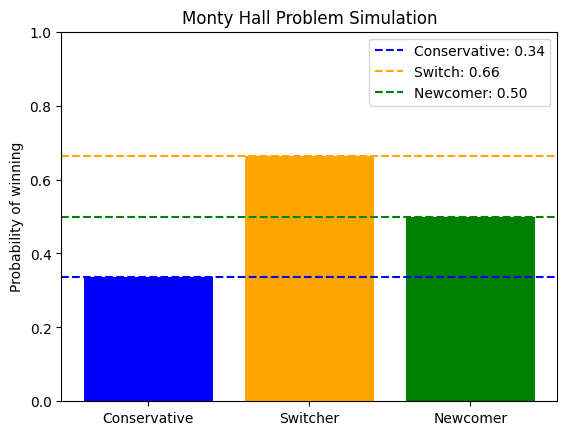

In [33]:
conservative_prob = conservative_wins / trials
switch_prob = switch_wins / trials
newcomer_prob = newcomer_wins / trials

probs = [conservative_prob, switch_prob, newcomer_prob]
labels = ['Conservative', 'Switcher', 'Newcomer']

plt.bar(labels, probs, color=['blue', 'orange', 'green'])
plt.ylabel('Probability of winning')
plt.title('Monty Hall Problem Simulation')
plt.ylim(0, 1)
plt.axhline(y=conservative_prob, color='b', linestyle='--', label=f'Conservative: {conservative_prob:.2f}')
plt.axhline(y=switch_prob, color='orange', linestyle='--', label=f'Switch: {switch_prob:.2f}')
plt.axhline(y=newcomer_prob, color='g', linestyle='--', label=f'Newcomer: {newcomer_prob:.2f}')
plt.legend()
plt.show()

rendo sto grafico più carino

Aggiungo spiegazione del problema

Generalizzo il problema a p porte aperte e plotto al variare di p ed N e vedo cosa succede e spiego il risultato

faccio eventualmente l'esercizio opzionale che è chill